#  Airbnb 

It is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

### Problem Statement: 

The total price of a reservation on Airbnb is based on the nightly rate set by the host, plus the addition of other fees or costs determined by either the host or Airbnb. In this data tale let us check the factors that influence the nightly prices

1) To predict the nightly prices for different accomodations.

2) To check factors that influences the price.

3) Does the grographical location plays an important role in deciding the price factor.

4) What is a difference of price between host and a super host


## Importing and Data Inspection

####  importing important libraries and reading the dataset

In [153]:
import pandas as pd     # data processing
import numpy as np      # linear algebra
import matplotlib.pyplot as plt  # data visualization
%matplotlib inline
import seaborn as sns           # seaborn is another library for visualization of data
colour=sns.color_palette()

In [154]:
air_df=pd.read_csv('D:\\datas\\airbnb_train.csv') # reading the data set

In [155]:
print(air_df.shape)  #checking the dataset dimensions

(1000, 30)


the dataset has 1000 observations with 30 variables

#### Data Inspection

In [156]:
pd.set_option('display.max_column',30) # to display all the columns of the dataset, we set max column limit
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [157]:
air_df.info()  #to get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we notice the following:

1) the dataset has 23- continuous and 7-object variables

2) the dataset is 234.5KB in size

3) We also notice a lot of missing value with some variables, we shall go for a deeper analysis for the same.

### Data Description:

Id- Serial no.

price- price per night

host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)

host_total_listings_count:how many listings the host is responsible for in total.

host_identity_verified: t- True, the host identity is verified, f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)

latitude: geographical location of the place with respect to latitude.

longitude: geographical location of the place with respect to longitute.

property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)

room_type: Type of room (e.g. sharing, private, entire house etc)

accommodates: total no. of people the property can accommodate.

bathrooms: no. of bathrooms.

bedrooms: no. of bedrooms

beds:no. of beds. 

security_deposit: security deposit amount.

cleaning_fee: fee charged for cleaning.

extra_people: extra people charges.

minimum_nights: duration of stay minimum nights. 

maximum_nights: duration of stay maximum nights.

number_of_reviews: total no. of reviews.

(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)

instant_bookable- t-True booking can be done instantly, f-False booking cannot be done instantly.

is_business_travel_ready: is it ready for stay related to business purpose.

cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)

reviews_per_month: monthly review scores

### Target Variable: 

Price: This variable displays the price per night of different host

In [158]:
air_df.describe(include='all').T  ##statistical description of the continuous and categorical variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1000,NaN,NaN,NaN,499.5,288.819,0,249.75,499.5,749.25,999
price,1000,NaN,NaN,NaN,145.521,91.4285,18,75,120,195.75,449
host_is_superhost,998,2,f,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,998,NaN,NaN,NaN,7.04409,27.2345,1,1,1,2,205
host_identity_verified,998,2,f,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1000,NaN,NaN,NaN,-33.8668,0.068062,-34.0925,-33.8997,-33.885,-33.843,-33.4018
longitude,1000,NaN,NaN,NaN,151.206,0.0807778,150.651,151.183,151.217,151.261,151.339
property_type,1000,19,Apartment,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,1000,3,Entire home/apt,589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,1000,NaN,NaN,NaN,2.988,1.68187,1,2,2,4,16


from the above statistical description we can see that:

1) In host_total_listings_count the 75 percentile is 2 and the maximum values is 205, this means there are some outliers in the variable.
2)security_deposit- The 75th percentile is 500 and the maximum value is 6000, we can say that this is an outliers in the variables.
3)extra_people and maximum nights too have a a huge differece between the 75th percentile and the maximum values. Hence we can say that these variables have some outliers.

we need detailed investigation into outliers and missing values situations in order to take the necessary steps

2) variables like host_is_superhost, bathrooms, beds, security deposit has some missing values



We can see that most variables has only two levels i.e true or false, some varibles like room_type and cancellation_policy has 3 levels and variable property_type has 19 levels.

host_is_superhost and host_identity_verified have 2 missing values each

## Data Pre-Processing

While dataset inspection we found that variables like 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location' and 'review_scores_value' are categorical in nature. so we change the datatype of those variable into categorical variable.

In [159]:
num_cat=[ 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location', 'review_scores_value', 'review_scores_communication']

In [160]:
for var in num_cat:       #changed the variables categorical in nature into categorical dtype 
    air_df[var] = air_df[var].astype('category')

changing the object variabels into categorical variables will lower the memory consumption hence its better we change all the object variables in to categorical variable 

Let's convert all the object variables into categorical variables 

In [161]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null category
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null category
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null category
room_type                      1000 non-null category
accommodates                   1000 non-null category
bathrooms                      997 non-null category
bedrooms                       1000 non-null category
beds                           998 non-null category
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64


#### Outlier Analysis

In some cases, the values of the variables fall in the extreme range, which will impact the model fitting
 in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5 * IQR) and (Q3+1.5 * IQR)

IQR- Inter-quartile range,
Q1- first quartile 
Q3-third quartile

sometimes  these values are random, but sometimes it is not random it adds certain information to the data. In this cases we cannot drop these outliers. We term them as business outliers.

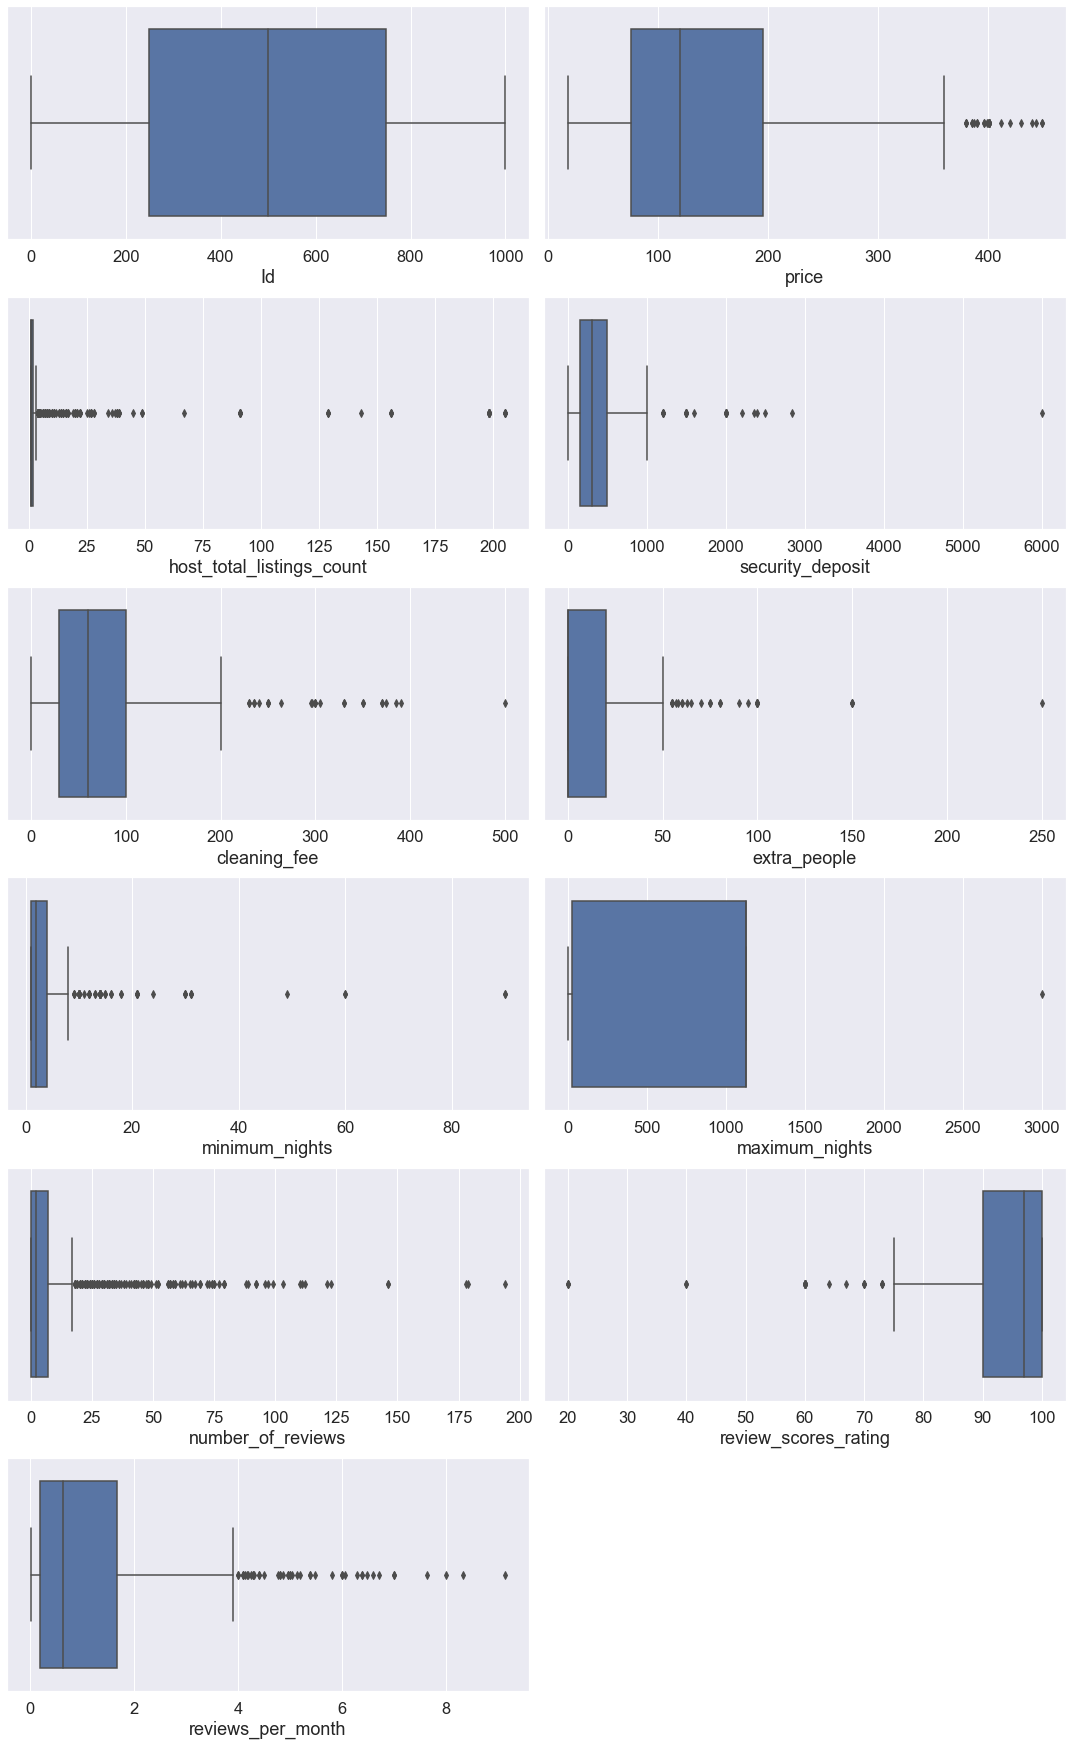

In [162]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(('int64', 'float64')):
    if (column!='longitude' and column!='latitude'):  
        plt.subplot(15,2,n)
        sns.boxplot(x=air_df[column])
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_counts: we see some hosts have listing more than 50. this can be business outliers,

accommodates: some host do have provisions to accommodate larger groups. similarly with bathrooms, bedrooms and beds variables

maximum_nights_stay: 3000 nights stay cannot be accounted practically. we can remove the outlier in maximum nights. 
minimum_nights: in general minimum night stay is mostly  between 1 - 2 , inorder to avoide unnecessary information loss we shall  drop the data above 40 minimum nights

security deposit- 6000 as security deposit is way too high, considering the nightly price. its better to have that observation drop as we do not noise interference in our model

cleaning fee, extra people charges and reviews seem to have outlier that can be potentially business outliers. 
We can always come back to outliers analysis, if we face any accuracy problem while fitting the models.

In [163]:
air_df[air_df['minimum_nights'] > 40]  # observations that have minimum nights above 40

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
102,102,225,f,3.0,t,-33.774309,151.286700,House,Entire home/apt,7,2.0,4,3.0,1200.0,150.0,0,60,180,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,f,f,moderate,0.02
351,351,89,f,1.0,f,-33.882974,151.222259,Apartment,Entire home/apt,2,1.0,0,1.0,NaN,100.0,0,90,121,3,93.0,9.0,9.0,10.0,10.0,10.0,10.0,f,f,moderate,0.12
392,392,100,f,8.0,t,-33.697637,150.965894,House,Entire home/apt,6,2.5,3,3.0,NaN,NaN,0,49,49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,strict,NaN
453,453,248,f,1.0,t,-33.897472,151.198359,House,Entire home/apt,4,1.0,2,2.0,NaN,NaN,0,90,180,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.20
771,771,39,f,1.0,f,-33.795224,151.270880,Apartment,Private room,1,1.0,1,1.0,NaN,NaN,30,60,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN


We can see that there are only 5 observation for minimum_nights >40

In [164]:
air_df= air_df[air_df['minimum_nights']<40]

In [165]:
air_df[air_df['maximum_nights']>1500]

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
780,780,100,f,1.0,t,-33.889988,151.193362,Apartment,Entire home/apt,2,1.0,0,1.0,150.0,50.0,0,12,3000,19,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,1.38


We see that there is only one observation for maximum nights>1500. this is definitely an outliers

In [166]:
air_df = air_df[air_df['maximum_nights']<1500]

In [167]:
pd.set_option('display.max_column',30)
air_df[air_df['security_deposit']>4000]

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
304,304,350,f,2.0,t,-33.89893,151.173894,Townhouse,Entire home/apt,6,1.5,3,3.0,6000.0,50.0,150,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,NaN


We notice that the price for the night stay is just 350, but with a security deposit of 6000 which is very unlikely. so, its safe to drop the outlier

In [168]:
air_df=air_df[air_df.security_deposit != 6000]  # remove the observation with security_Deposit 6000

In [169]:
air_df.shape

(993, 30)

In [170]:
air_copy=air_df.copy()

#### Missing Value Imputation

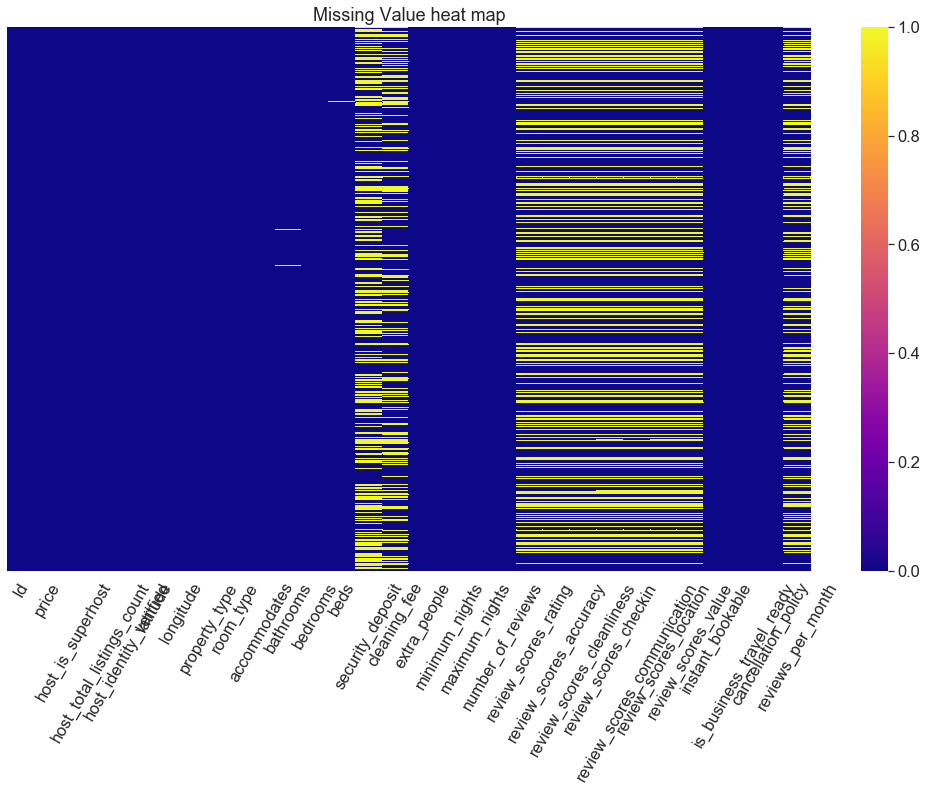

In [171]:
plt.figure(figsize=(18,10))   #graphical presentation of missing values in the dataset
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma') 
plt.xticks(rotation=60)
plt.title('Missing Value heat map')
plt.show()

In [172]:
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((air_df[col].isnull().sum()/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [173]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
5,security_deposit,422,42.50
10,review_scores_checkin,341,34.34
12,review_scores_location,341,34.34
13,review_scores_value,341,34.34
11,review_scores_communication,340,34.24
8,review_scores_accuracy,339,34.14
9,review_scores_cleanliness,339,34.14
7,review_scores_rating,337,33.94
14,reviews_per_month,308,31.02
6,cleaning_fee,304,30.61


from the above information we can see  that: 

security_deposit- has 42.5 % null values with 422 missing information 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value--has 34.34% missing values with 341,340 and 339 missing information in each column

reviews_per_month has 31.02% missing values with 308 missing information and cleaning_fee has 30.61% missing values with 304 missing information 
As there is a large no. of missing values. We need to have deeper analysis for the same.

but Variables like bathrooms, host_is_superhost, host_total_listings_count, host_identity_verified, beds have very less no. of missing values. So, it is safe to impute the missing value of these variables the conventional method. 

In [174]:
#imputing the continuous variables with less than 5 missing values with median value of that variable
for num in air_df.select_dtypes(('float64', 'int64')):
    if air_df[num].isnull().sum()<5:                         
        air_df[num]=air_df[num].fillna(air_df[num].median())

In [175]:
#imputing the missing value of a categorical variables with mode of that variable
for col in air_df.select_dtypes('category'):
    if air_df[col].isnull().sum()!=0:
        air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

In [176]:
air_df=air_df.drop('Id', axis=1) # we do not need Id for further analysis

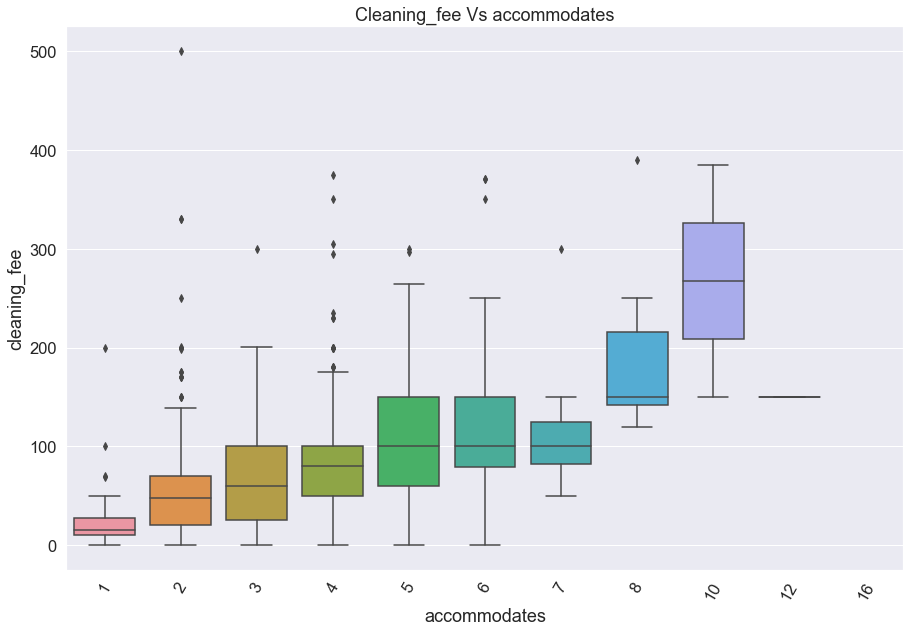

In [177]:
sns.set(font_scale=1.5)      #Cleaning fee ranges with respect to accommodates
plt.figure(figsize=(15,10))
sns.boxplot(x='accommodates', y='cleaning_fee', data=air_df)
plt.title('Cleaning_fee Vs accommodates')
plt.xticks(rotation=60)
plt.show()

from the above graph its is very clear that the average cleaning fee differes with the no. of accommodates. It is better to impute the missing values in cleaning fee variable with respect to the no. of accommodates

In [178]:
def impute_cleaning(cols):
    cleaning_fee=cols[0]
    accommodates=cols[1]

    if pd.isnull(cleaning_fee):
        if accommodates==1:
            return 40
        
        elif accommodates==2:
            return 60
        
        elif accommodates==3:
            return 85
        
        elif accommodates==4:
            return 90
        
        elif (accommodates==5 or accommodates==6 or accommodates==7):
            return 110
        
        elif (accommodates==8 or accommodates==12):
            return 155
        
        else:
            return 265
    else:
        return cleaning_fee
            
    

In [179]:
air_df['cleaning_fee']=air_df[['cleaning_fee', 'accommodates']].apply(impute_cleaning, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


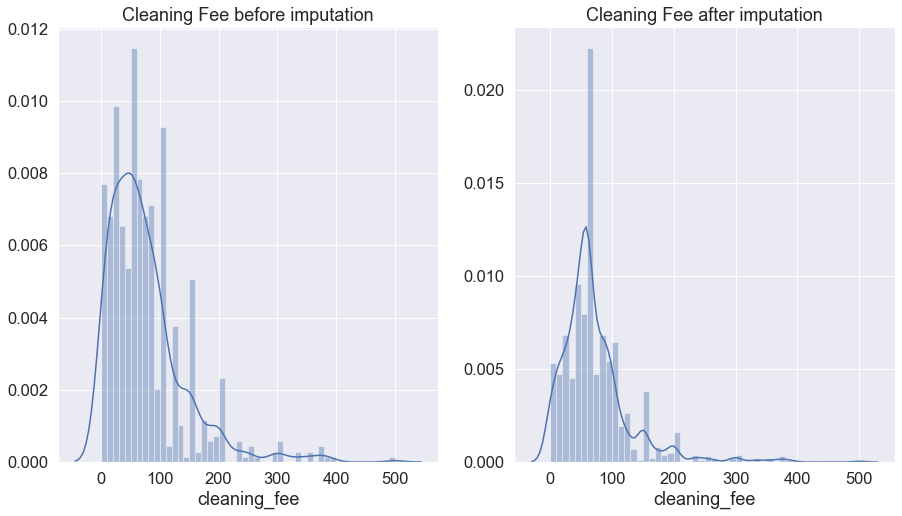

In [180]:
plt.figure(figsize=(15,8))     # cleaning fee variable before and after the missing value imputation
plt.subplot(1,2,1)
sns.distplot(air_copy['cleaning_fee'], bins=50, kde=True)
plt.title('Cleaning Fee before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['cleaning_fee'], bins=50, kde=True)
plt.title('Cleaning Fee after imputation')
plt.show()

lets calulate the central tendency Before and After imputation.

In [181]:
print('Before Imputation')     
print("mean:", air_copy["cleaning_fee"].mean())
print("median:", air_copy["cleaning_fee"].median())
print("mode:", air_copy["cleaning_fee"].mode())
print("After Imputation")
print("mean:", air_df["cleaning_fee"].mean())
print("median:", air_df["cleaning_fee"].median())
print("mode:", air_df["cleaning_fee"].mode())

Before Imputation
mean: 75.1044992743106
median: 60.0
mode: 0    50.0
dtype: float64
After Imputation
mean: 72.2980866062437
median: 60.0
mode: 0    60.0
dtype: float64


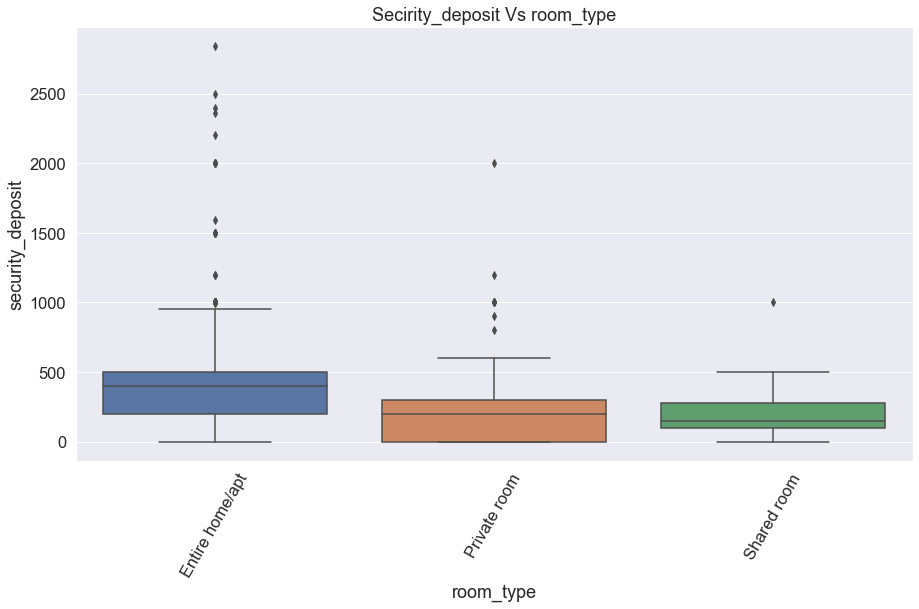

In [182]:
sns.set(font_scale=1.5)      #checking the security deposit ranges with respect to room_type variable
plt.figure(figsize=(15,8))
sns.boxplot(x='room_type', y='security_deposit', data=air_df)
plt.title('Secirity_deposit Vs room_type')
plt.xticks(rotation=60)
plt.show()

We notice that the secutrity deposit changes when the room type changes

In [183]:
def impute_security(cols):
    security_deposit=cols[0]
    room_type=cols[1]
    
    if pd.isnull(security_deposit):
        if room_type== 'Entire home/apt':
            return 476
        
        elif room_type=='Private room':
            return 300
       
        else:
            return 475
    else:
        return security_deposit

In [184]:
air_df['security_deposit']=air_df[['security_deposit', 'room_type']].apply(impute_security, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


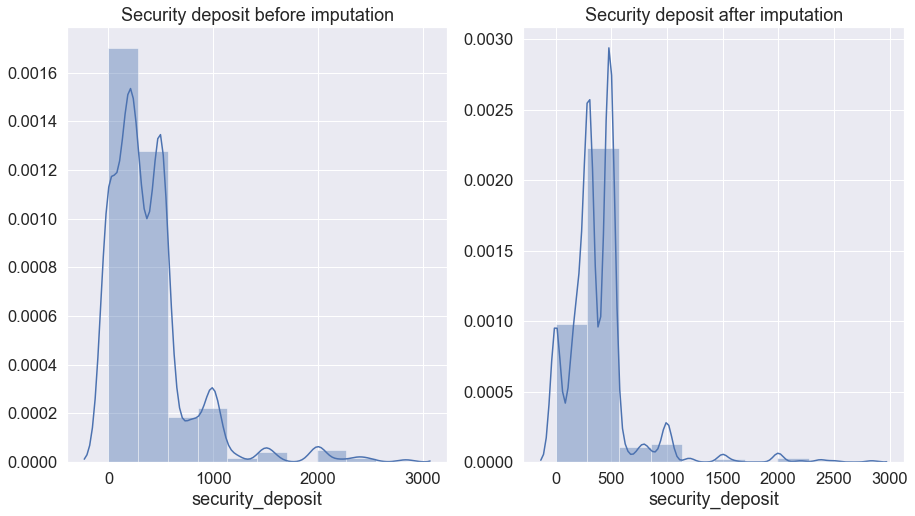

In [185]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['security_deposit'], bins=10, kde=True)
plt.title('Security deposit before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['security_deposit'], bins=10, kde=True)
plt.title('Security deposit after imputation')
plt.show()

lets calulate the central tendency Before and After imputation.

In [186]:
print('Before imputation')
print("mean", air_copy["security_deposit"].mean())
print("median", air_copy["security_deposit"].median())
print("mode", air_copy["security_deposit"].mode())
print("After Imputation")
print("mean", air_df["security_deposit"].mean())
print("median", air_df["security_deposit"].median())
print("mode", air_df["security_deposit"].mode())

Before imputation
mean 384.5989492119089
median 300.0
mode 0    500.0
dtype: float64
After Imputation
mean 384.7925478348439
median 300.0
mode 0    300.0
dtype: float64


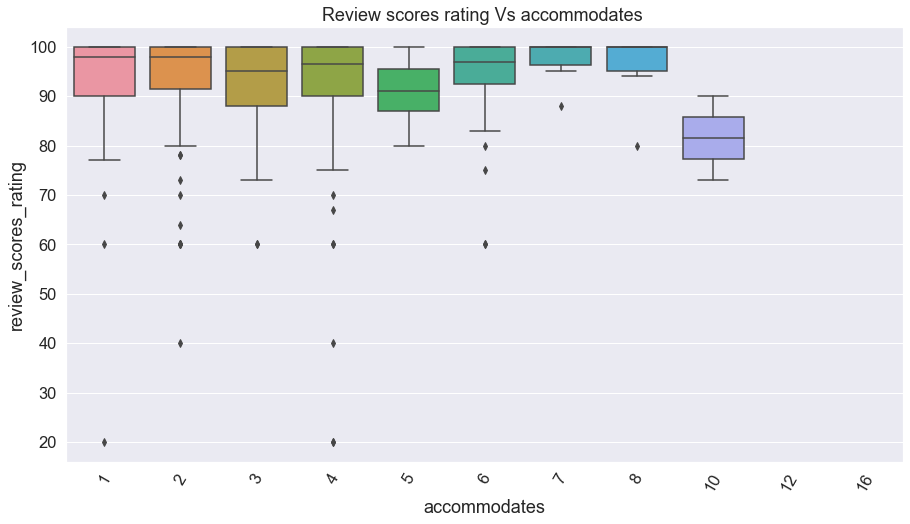

In [187]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.boxplot(x='accommodates', y='review_scores_rating', data=air_df)
plt.title('Review scores rating Vs accommodates ')
plt.xticks(rotation=60)
plt.show()

In [188]:
def impute_ratings(cols):
    review_scores_rating=cols[0]
    accommodates=cols[1]
    
    if pd.isnull(review_scores_rating):
        if (accommodates==1 or accommodates==2):
            return 97
        
        elif accommodates==3:
            return 92
        
        elif (accommodates==6 or accommodates==4):
            return 91
        
        elif accommodates==5:
            return 90
        
        elif (accommodates==8 or accommodates==7):
            return 96
        
        else:
            return 80
    else:
        return review_scores_rating
            

In [189]:
air_df['review_scores_rating']=air_df[['review_scores_rating', 'accommodates']].apply(impute_ratings, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


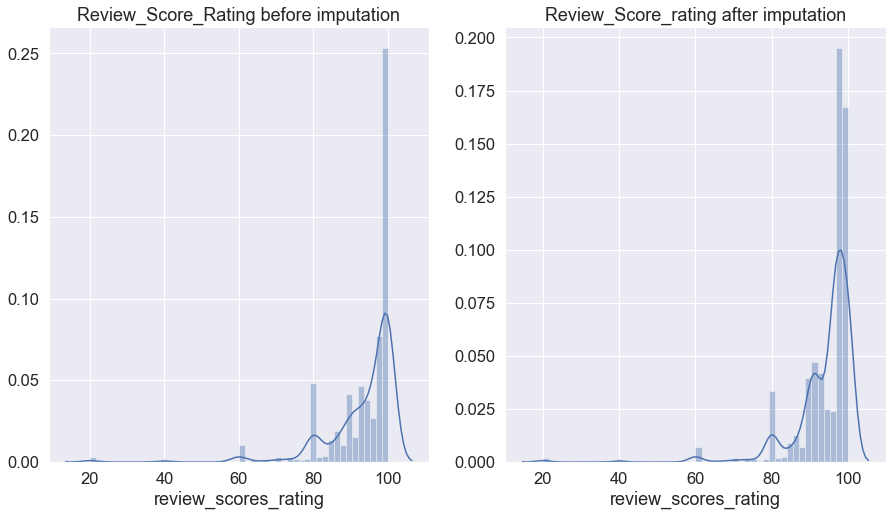

In [190]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['review_scores_rating'], bins=50, kde=True)
plt.title('Review_Score_Rating before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['review_scores_rating'], bins=50, kde=True)
plt.title('Review_Score_rating after imputation')
plt.show()

lets calulate the central tendency Before and After imputation.

In [191]:
print('Before imputation')
print("mean", air_copy["review_scores_rating"].mean())
print("median", air_copy["review_scores_rating"].median())
print("mode", air_copy["review_scores_rating"].mode())
print("After Imputation")
print("mean", air_df["review_scores_rating"].mean())
print("median", air_df["review_scores_rating"].median())
print("mode", air_df["review_scores_rating"].mode())

Before imputation
mean 93.30182926829268
median 97.0
mode 0    100.0
dtype: float64
After Imputation
mean 93.93152064451158
median 97.0
mode 0    97.0
dtype: float64


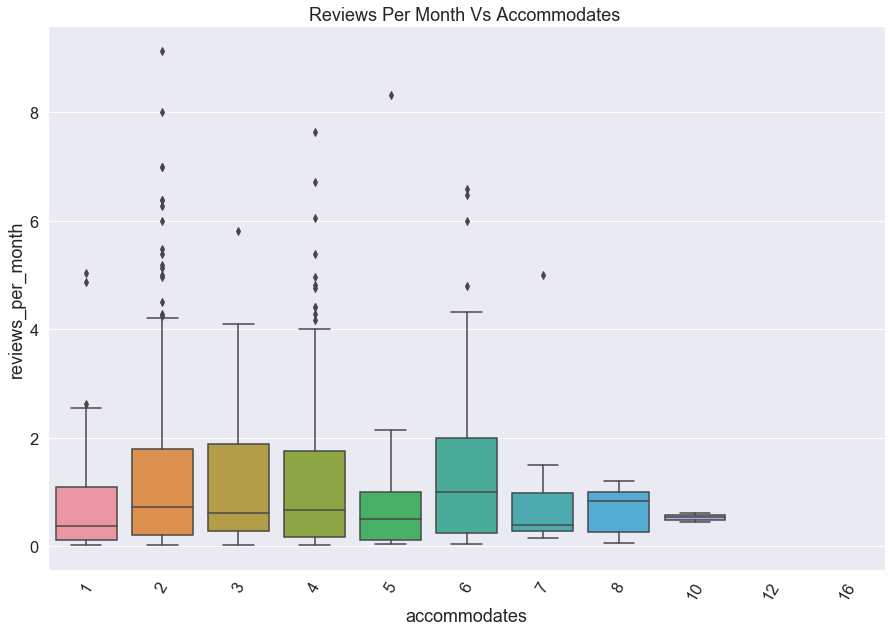

In [192]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(x='accommodates', y='reviews_per_month', data=air_df)
plt.title('Reviews Per Month Vs Accommodates ')
plt.xticks(rotation=60)
plt.show()

In [193]:
def impute_reviews(cols):
    reviews_per_month=cols[0]
    accommodates=cols[1]
    
    if pd.isnull(reviews_per_month):
        if accommodates==1: 
            return 0.70
        
        elif accommodates==5:
            return 0.62
        
        elif accommodates==2:
            return 0.66
        
        elif  accommodates==3:
            return 0.75
        
        elif accommodates==10:
            return 1.25
        
        elif (accommodates==6 or accommodates==4 or accommodates==8):
            return 1.56
        
        else:
            return 0.9
    
    else:
        return reviews_per_month

In [194]:
air_df['reviews_per_month']=air_df[['reviews_per_month', 'accommodates']].apply(impute_reviews, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


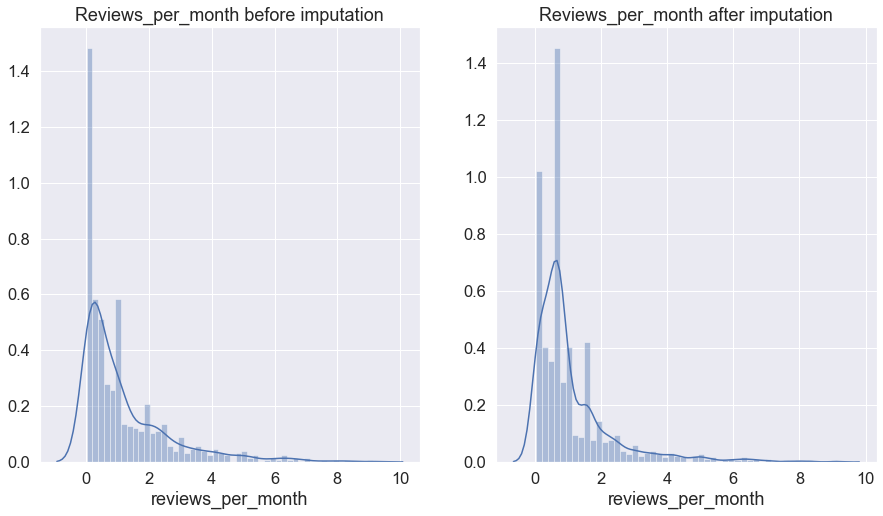

In [195]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['reviews_per_month'], bins=50, kde=True)
plt.title('Reviews_per_month before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['reviews_per_month'], bins=50, kde=True)
plt.title('Reviews_per_month after imputation')
plt.show()

lets calulate the central tendency Before and After imputation.

In [196]:
print('Before imputation')
print("mean", air_copy['reviews_per_month'].mean())
print("median", air_copy['reviews_per_month'].median())
print("mode", air_copy['reviews_per_month'].mode())
print("After Imputation")
print("mean", air_df['reviews_per_month'].mean())
print("median", air_df['reviews_per_month'].median())
print("mode", air_df['reviews_per_month'].mode())

Before imputation
mean 1.2082627737226272
median 0.64
mode 0    1.0
dtype: float64
After Imputation
mean 1.0970292044310148
median 0.66
mode 0    0.66
dtype: float64


## Exploratory Data Analysis

####  Univariate Analysis

let's bin the price variables for easy interpretation through visualization

In [197]:
bins=[0,75,100,150,250,500]
labels=['very low', 'low', 'moderate', 'High', 'veryhigh']
air_df['price_bins']=pd.cut(air_df['price'], bins=bins, labels=labels)
air_df['price_bins']=air_df['price_bins'].astype('category')

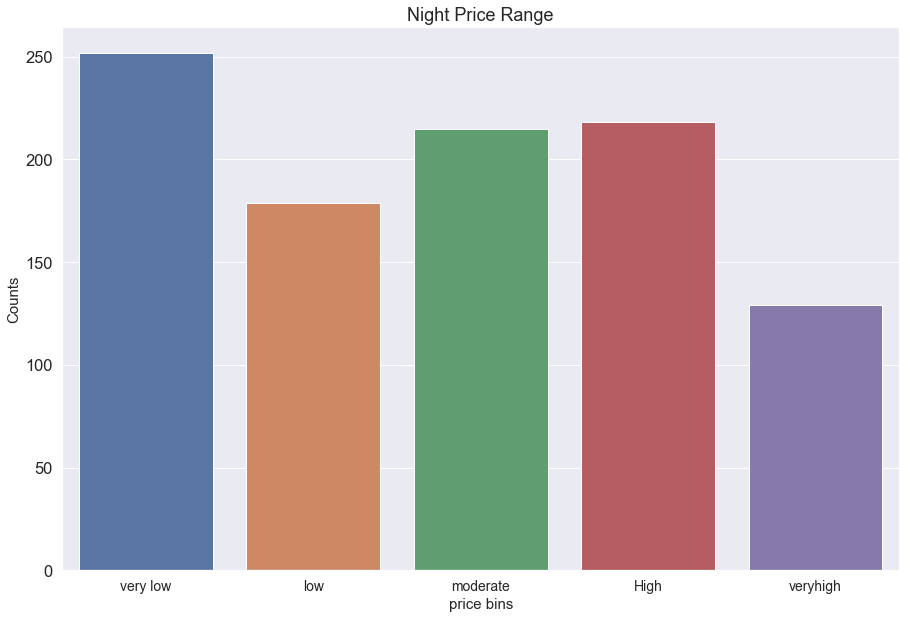

In [198]:
plt.figure(figsize=(15,10)) # fig height need to reduce it
sns.countplot(x='price_bins', data=air_df)
plt.xlabel('price bins', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Night Price Range', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

from the above graph we can see that the nightly prices are right skewed, this means that the mean will be higher than the mode. Around 250 hosts charges night price <75, around 180 hosts charge between 75-100, and 220 host charge between 100-150. only 70 hosts charge between 300-500

#### Continuous variable

univariate analysis for price is already done above. univariate analysis of longitude and latitude is not required

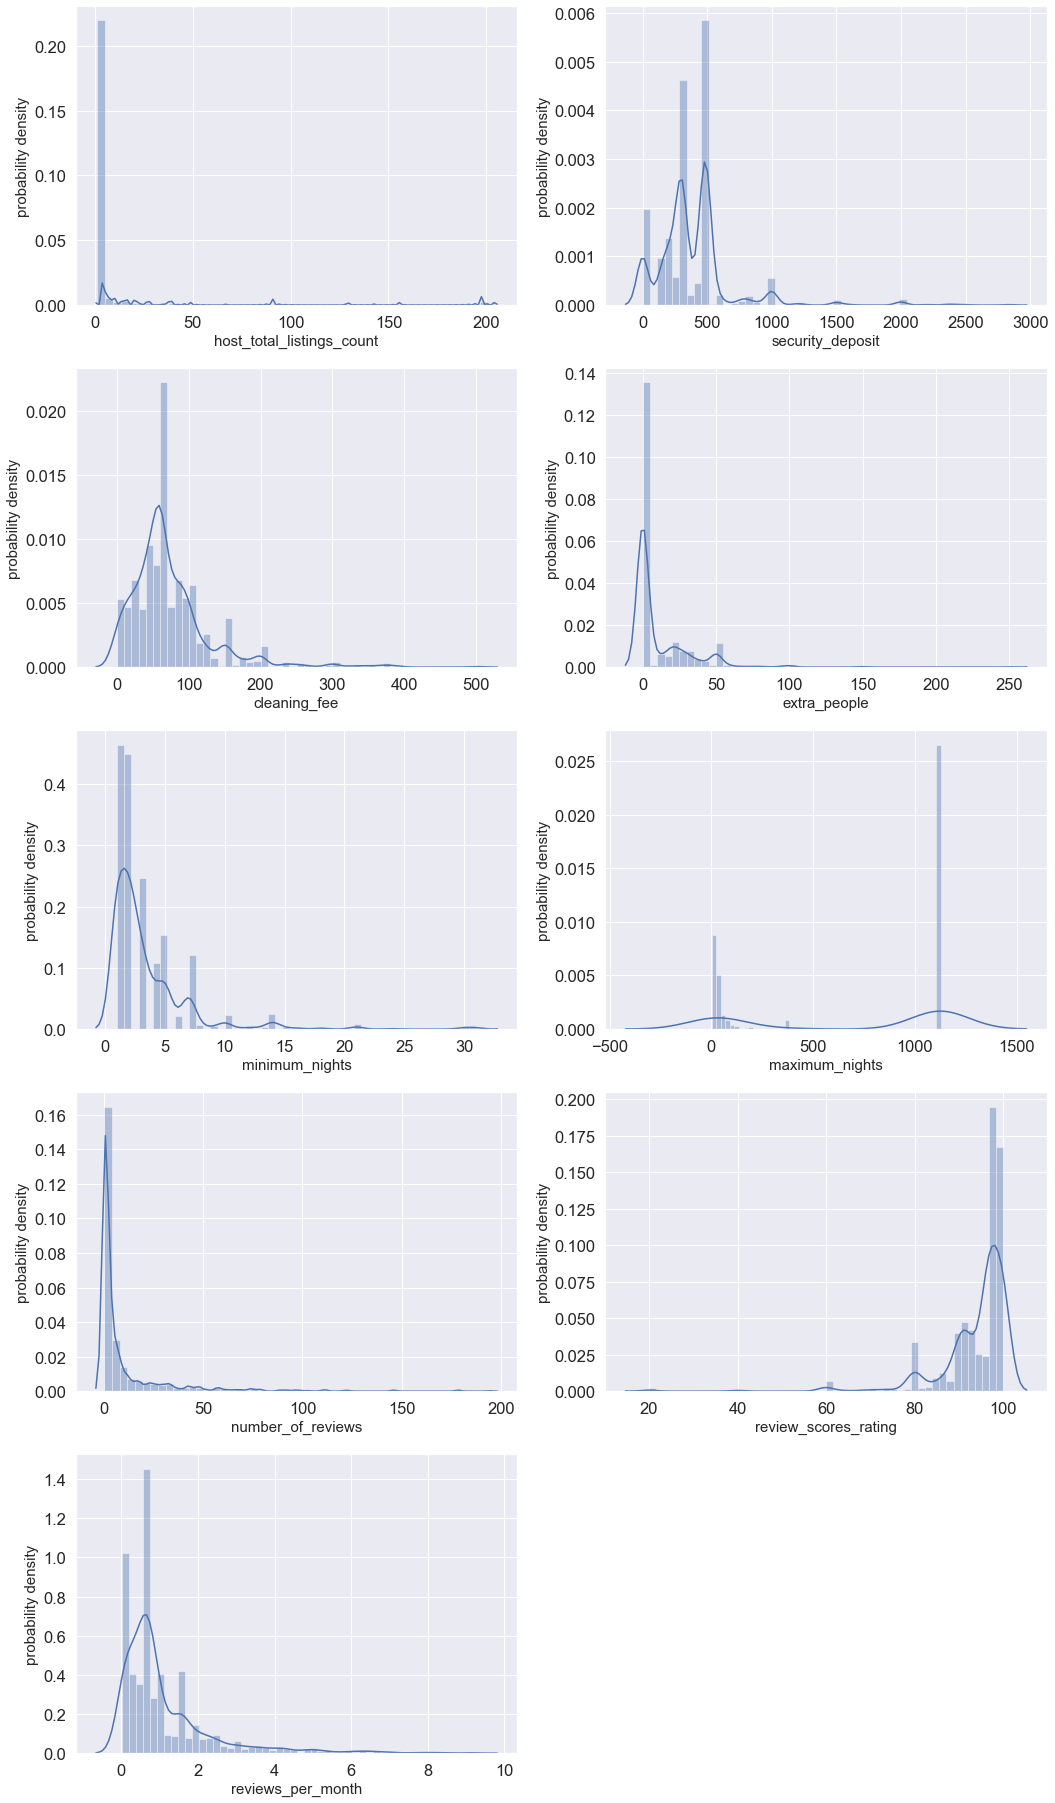

In [199]:
plt.figure(figsize=(15,60)) 
n=1
for col in air_df.select_dtypes(('float64', 'int64')):
    if (col!='price' and col!='longitude' and col!='latitude'):   
        plt.subplot(12,2,n)
        sns.distplot(air_df[col], kde=True, bins=50)
        plt.ylabel('probability density', fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_count: We see maximum no. of hotels have listings less than 10. only a very few have listings more than 15.

security_deposit: we see a maximum no. of places charging security deposit between 0 to 1000. 

cleaning fee, extra people fees seems to have some business outliers. But we can always revisit it if we face any accuracy problem while modeling

We notice maximum_nights having two peaks and almost no values between 300 to 1000. We need some deeper analysis for this variable

In [200]:
pd.set_option('display.max_row',100)
air_df['maximum_nights'].value_counts()

1125    591
30       50
14       38
7        27
60       19
15       18
90       18
365      18
28       16
10       16
21       14
5        14
20       12
31        9
3         7
12        7
120       6
6         6
8         6
45        5
42        5
22        5
11        5
35        5
100       4
200       4
26        4
40        4
62        3
25        3
18        3
13        3
24        3
9         3
180       3
4         3
19        2
16        2
34        2
1         2
65        2
32        2
37        2
50        2
59        2
92        1
2         1
360       1
350       1
112       1
1126      1
99        1
95        1
23        1
91        1
89        1
29        1
46        1
43        1
17        1
38        1
1124      1
999       1
Name: maximum_nights, dtype: int64

Now, we can clearly see that the maximum night are actually categorical in nature. Different hosts have different maximum nights policy, some are for 3-years, some for 6 months, 3-months, 1-months, 2-weeks, 3-weeks etc. So it is better to convert the maximum nights in to categorical variable.

In [201]:
bins=[0,10,18,25,45,110,200,370,1126]
labels=['1-week or less', '2-weeks', '3-weeks', '1-month', '3-months', '6-months', '1-year', '3-years']
air_df['maximum_nights']=pd.cut(air_df['maximum_nights'], bins=bins, labels=labels)
air_df['maximum_nights']=air_df['maximum_nights'].astype('category')

Now that we have converted the maximum nights to categorical, it justifies to check and convert the minimum nights as well

In [202]:
air_df['minimum_nights'].value_counts()

1     277
2     268
3     147
5      92
7      72
4      64
14     15
10     14
6      13
21      5
8       4
9       3
31      3
30      3
12      3
13      2
15      2
16      2
18      2
24      1
11      1
Name: minimum_nights, dtype: int64

In [203]:
bins=[0,1,2,3,4,5,7,14,21,31]
labels=['1-night', '2-nights', '3-nights', '4-nights', '5-nights', '1-week', '2-week', '3-week', '1-months']
air_df['minimum_nights']=pd.cut(air_df['minimum_nights'], bins=bins, labels=labels)
air_df['minimum_nights']=air_df['minimum_nights'].astype('category')

step:7 categorical variables

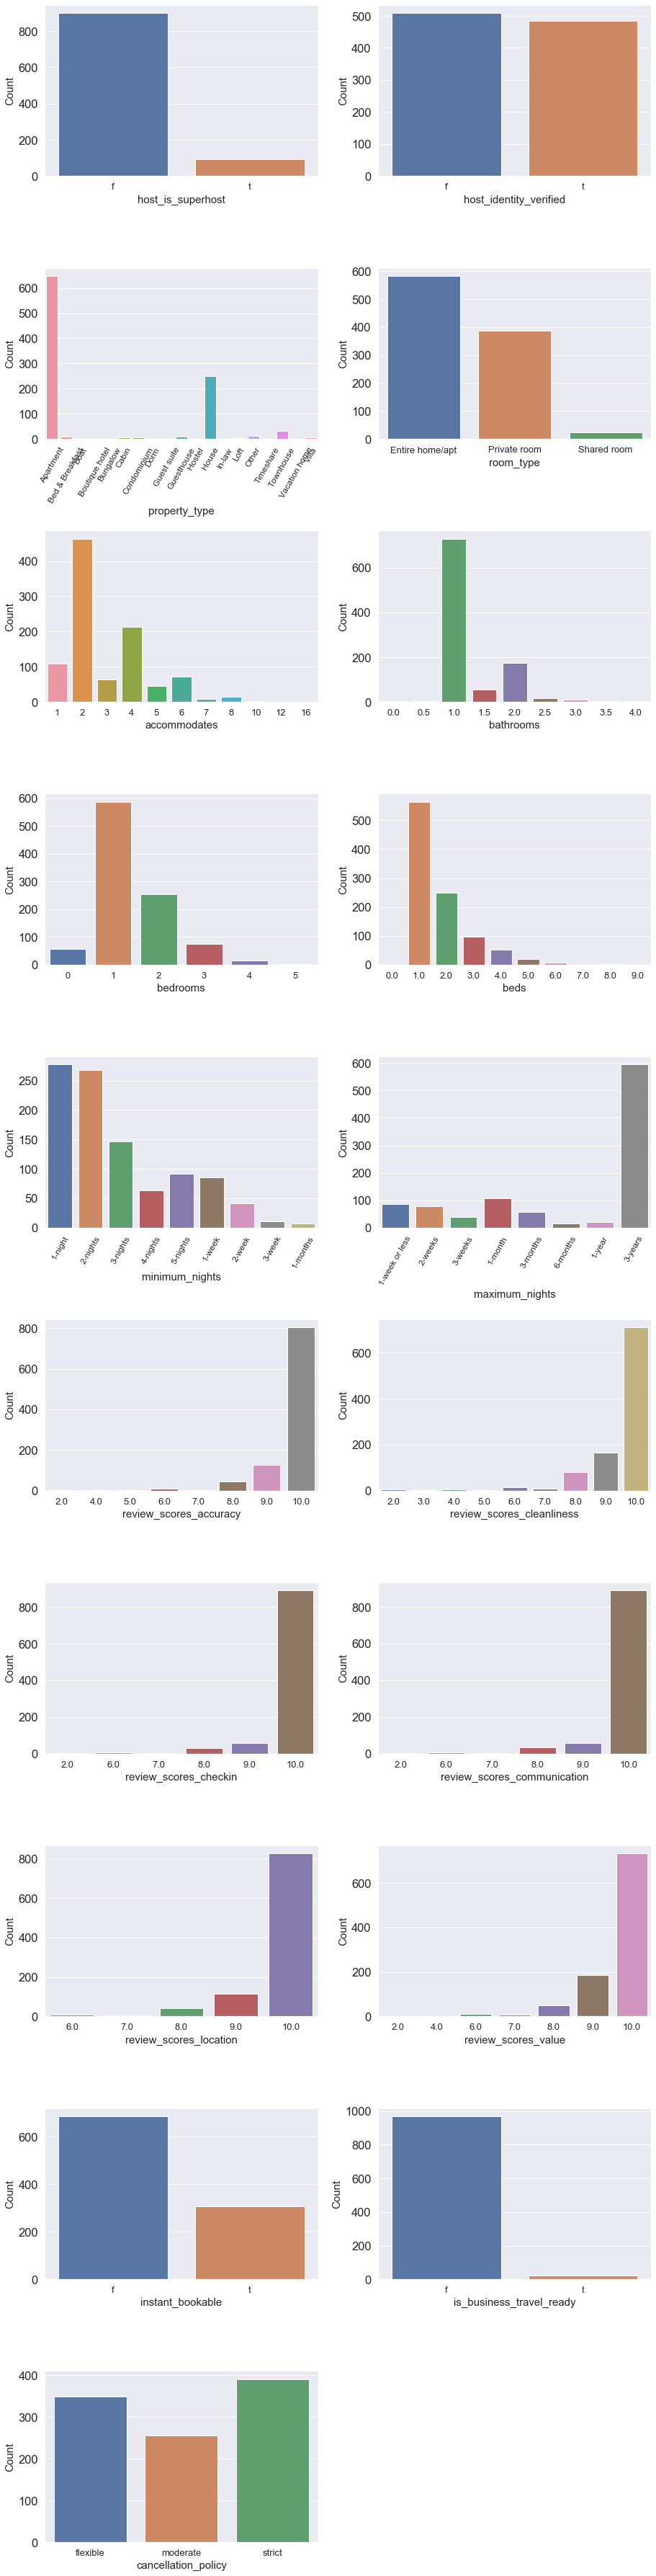

In [204]:
plt.figure(figsize=(13,50))
n=1
for col in air_df.select_dtypes('category'):
    if col!='price_bins':
        plt.subplot(10,2,n)
        sns.countplot(x=col, data=air_df)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col,fontsize=15)
        plt.xticks(fontsize=13)
        plt.tight_layout()
        n=n+1
        if (col=='property_type' or col=='maximum_nights' or col=='minimum_nights'): # changing the orientation of xticks 
            plt.xticks(rotation=60, fontsize=12)
plt.show()


host_is_superhost: f- False, t-True, We can see that more than 90% of places are not a superhost.

host_identity_verified: f-False, t-True, around 500 places identity is not verified. i.e only 50% of places have their identity verified.

property_type: A large no. of places are apartments and houses. 'room_type' and 'property_type' are interrelated, we notice that a large no of apartment and houses are given on rent or leasing entirely, only in some properties we see the provision of private rooms and even less no. of shared room provisions. This can be because most of the visitor prefer to have and give some privacy. Most of the hosts have policy of minimum night stay as 1 or 2, but if you notice their maximum night stay is for 3 years. This means they are open for long duration stay.

accommodates: approx 500 places can accommodate only 2 people and approx 230 places can accomodate 4 people. This means we have 
very limited options for group bookings. 
since a large no. of places can accommodate only 2 people, we also see they have amenities like 1 bathroom, 1 bedrooms and 1 or 2 beds to support their guests.

0.5 bathroom -only consist of a sink and a toilet- it does not have any bathing facility

almost 500 hotels have 10 on 10 review scores for accuracy, location, cleaniness etc
Very less no. of places can be instantly booked, and even lesser no. of places are ready for business travelers. Most of the host have a strict cancellation policy while considerable no. of hosts are flexible with it.

#### Part :2 Bi-variate Analysis

Analysis of independent variables with respect to target

first lets check the correlation of continuous variable w.r.t price

graphical representation of the correlation between variables using heatmap

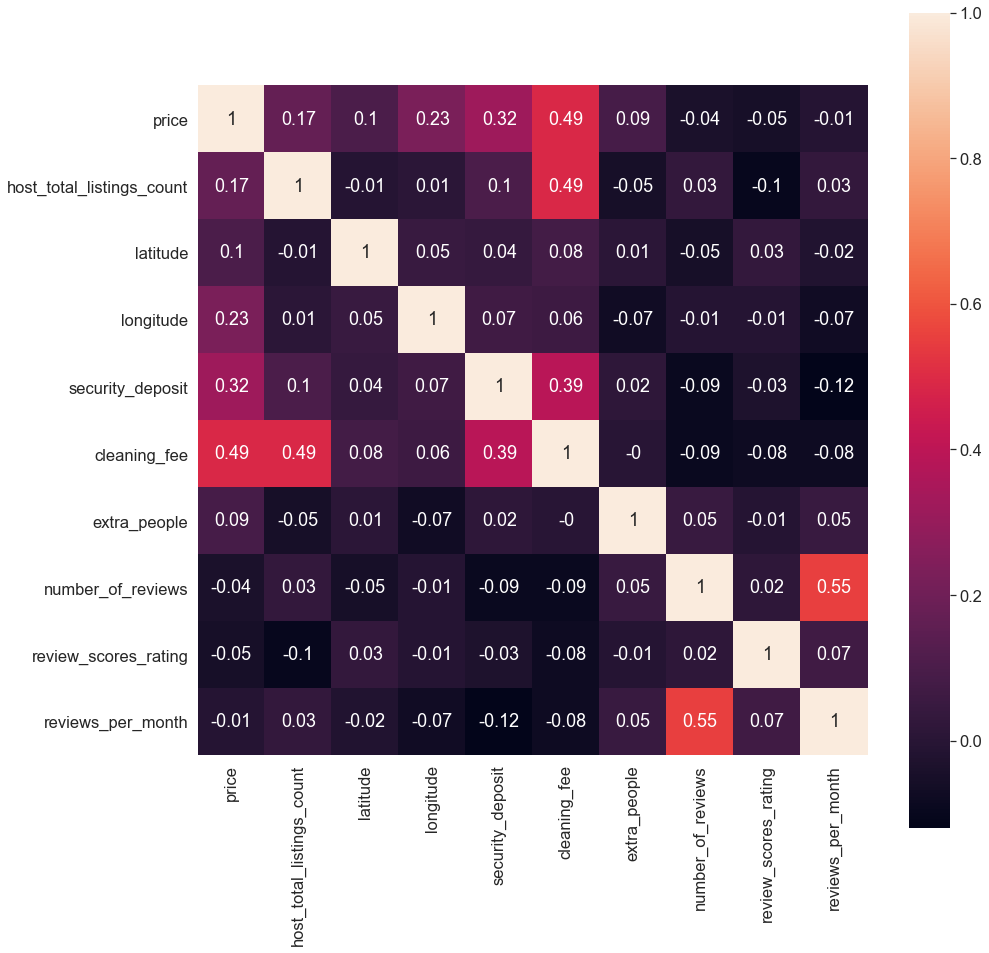

In [205]:
plt.figure(figsize=(15,15))
corr=round(air_df.corr(),2)
ax=sns.heatmap(corr, square=True, annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

variables like cleaning_fee, security_deposit and longitude shows good correlation with the price.
We also see a lot of correlation between host_total_listings_count and cleaning_fee,
and also no. of review and reviews per month are correlated

longitude: correlation with price signifies that price are also dependent on location.

In [206]:
num_col=[]
correlation=[]
for x in air_df.select_dtypes(('float64', 'int64')):
    if x!='price':
        corr=round(air_df['price'].corr(air_df[x]),2)
        correlation.append(corr)
        num_col.append(x)
    

In [207]:
corr_table=pd.DataFrame({'columns': num_col, 'correlation':correlation})
corr_table.sort_values(by='correlation', ascending=False)

,columns,correlation
4,cleaning_fee,0.49
3,security_deposit,0.32
2,longitude,0.23
0,host_total_listings_count,0.17
1,latitude,0.10
5,extra_people,0.09
8,reviews_per_month,-0.01
6,number_of_reviews,-0.04
7,review_scores_rating,-0.05


from the table we can see that variables hotel_total_listings_counts, extra_people too are slightly correlated with the target variable 

### Price range w.r.t accomodates

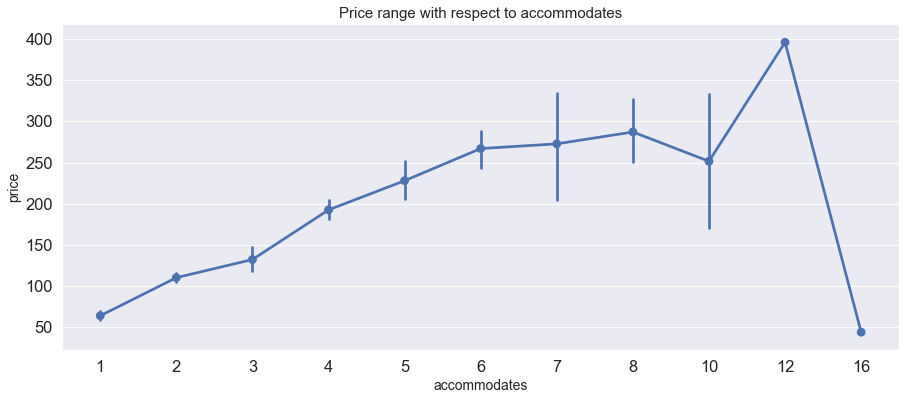

In [208]:
plt.figure(figsize=(15,6))
sns.pointplot(x='accommodates', y='price', data=air_df)
plt.title('Price range with respect to accommodates',fontsize=15)
plt.ylabel('price', fontsize=14)
plt.xlabel('accommodates', fontsize=14)
plt.show()

 We see a gradual increase in price as the no. of accommodates increases. but there is dip in price when the accomodates are 10 and 16. lets check why is there a price such a steep drop for 16 accommodates

In [209]:
sixteen_acc=air_df[air_df['accommodates']==16]
sixteen_acc.T

,429
price,44
host_is_superhost,f
host_total_listings_count,3
host_identity_verified,f
latitude,-33.8909
longitude,151.237
property_type,House
room_type,Shared room
accommodates,16
bathrooms,3


16 accommodates:  it’s a house with a single bedroom, 3 bathrooms and 8 beds which is supposed to be shared hence there is fall in the price for 16 accommodates. We notice that this observation is not of much importance.

In [210]:
air_df=air_df[air_df.accommodates!=16]  # dropping the observation with 16 accommodates

In [211]:
b_group=['bathrooms', 'bedrooms', 'beds']  # groupig the three variables for better visualization

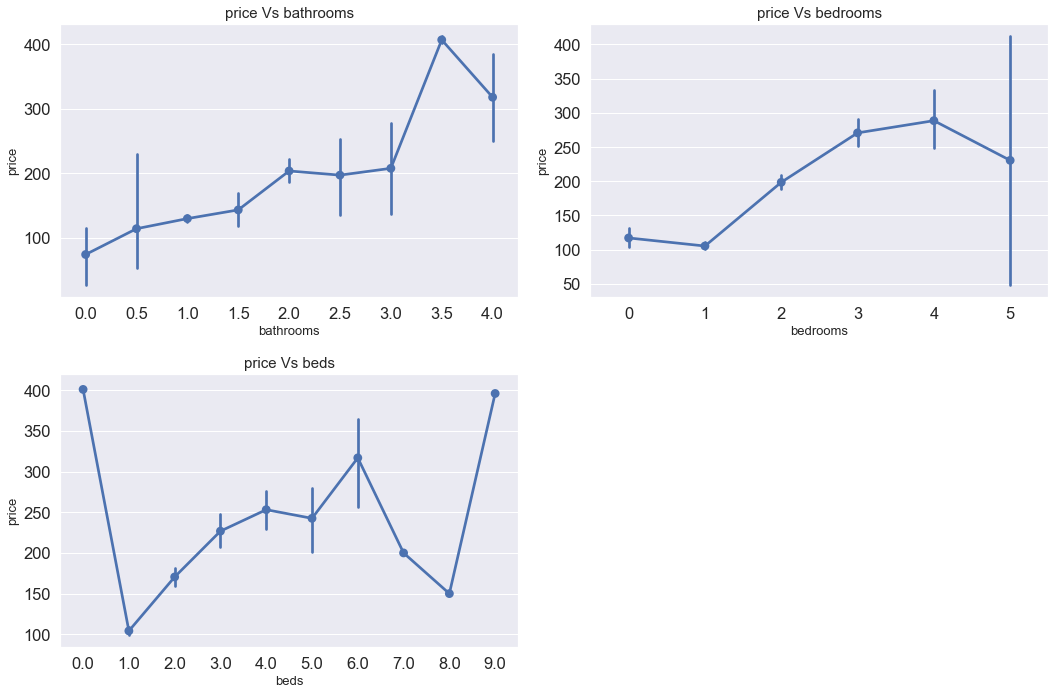

In [212]:
plt.figure(figsize=(15,10))
n=1
for var in b_group:
    plt.subplot(2,2,n)
    sns.pointplot(x=var, y='price', data=air_df)
    plt.ylabel('price', fontsize=13)
    plt.xlabel(var, fontsize=13)
    plt.title('price Vs ' + var, fontsize=15)
    plt.tight_layout()
    n=n+1
plt.show()

price increases with increase in the no. of bedrooms and bathrooms. 

beds: price of bed increase gradually when from 1 bed to 6 beds, 7 and 8 beds price slows down. We also see that the price for 0.0 beds is way too high lets go into its details.

In [213]:
air_df[air_df['beds']==0.0].T

,754
price,401
host_is_superhost,f
host_total_listings_count,91
host_identity_verified,t
latitude,-33.8864
longitude,151.239
property_type,House
room_type,Entire home/apt
accommodates,6
bathrooms,2


from the above table we infer that it accommodates 6 people with a facility of 2 bathrooms and bedrooms. The maximum nights stay is 3 years. It is pratically impossible for it to have 0 beds. We can say that there is an imputation error with the no. of beds in this observation. Its better to drop this particiular observation.  

In [214]:
air_df=air_df[air_df['beds']!=0.0]

In [215]:
payments=['cleaning_fee', 'security_deposit']  #grouping two variables for better visualization and comparison

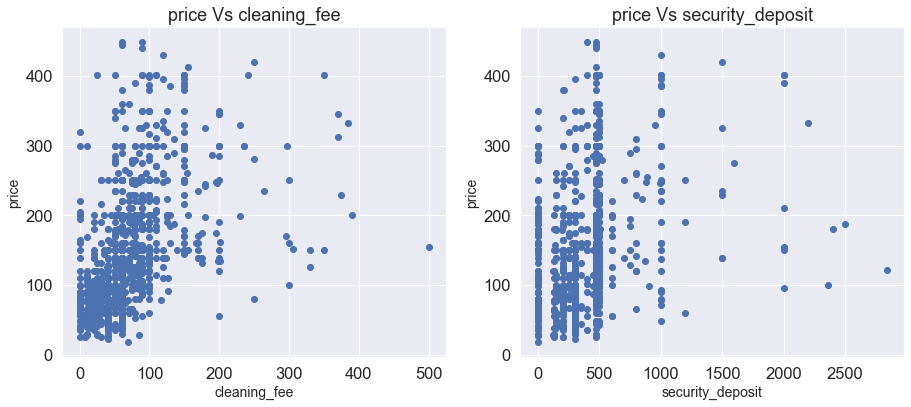

In [216]:
plt.figure(figsize=(13,6))
n=1
for pay in payments:
    plt.subplot(1,2,n)
    plt.scatter(air_df[pay], air_df['price'])
    plt.xlabel(pay, fontsize=14)
    plt.ylabel('price', fontsize=14)
    n=n+1
    plt.title('price Vs ' + pay)
    plt.tight_layout()
plt.show()

Cleaning Fee:  we notice that the most of host cleaning fee below 100 has night charges below 200. Some host with cleaning fee greater than 200 has higher nightly charges.
security deposit: We see that most of the hotel has a security deposit of 0-500 range. some host which has a higher security deposit range has has higher nightly charges

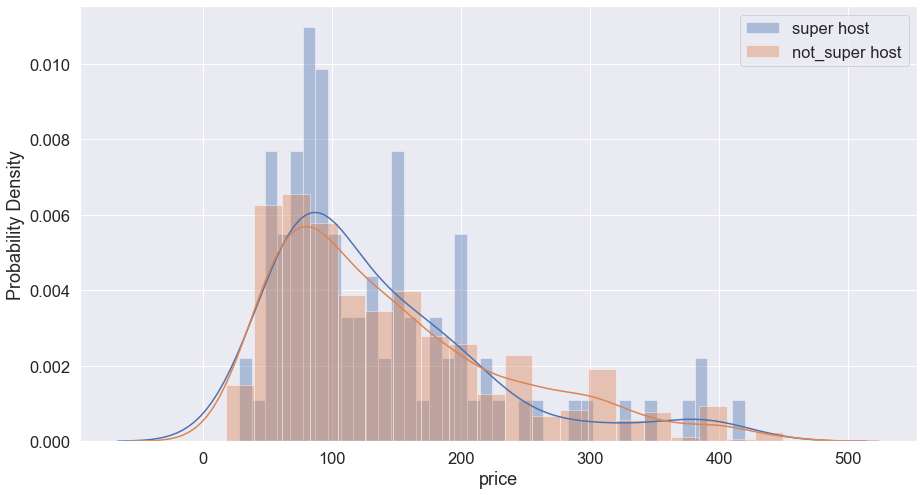

In [217]:
plt.figure(figsize=(15,8))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,1,1)
sns.distplot(super_host['price'], kde=True, bins=40, label='super host')
sns.distplot(no_super_host['price'], kde=True, bins=20, label='not_super host') 
plt.ylabel('Probability Density')
plt.legend()
plt.show()


we see that both super_host and not_super_host have same price distribution. i.e. the price for both super_host and not a super host are right skewed. This means there is no price variations between a host and a super host.

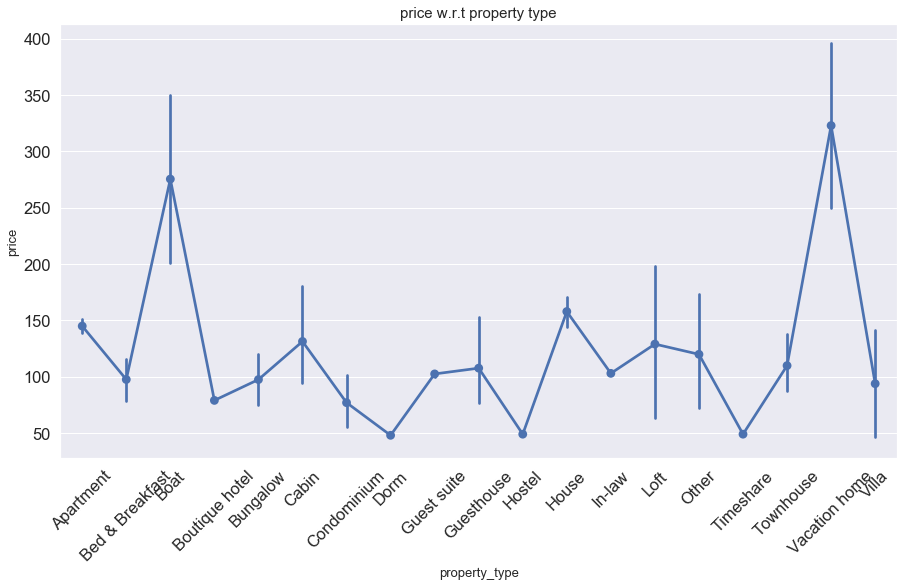

In [218]:
plt.figure(figsize=(15,8))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('property_type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.title('price w.r.t property type', fontsize=15)
plt.show()

If we are planning for a budget trips then, timeshare, Dorm and Hostel are the best options. If you are planning A honeymoon or lavish vacation then boat and vactaion homes will be the best choices

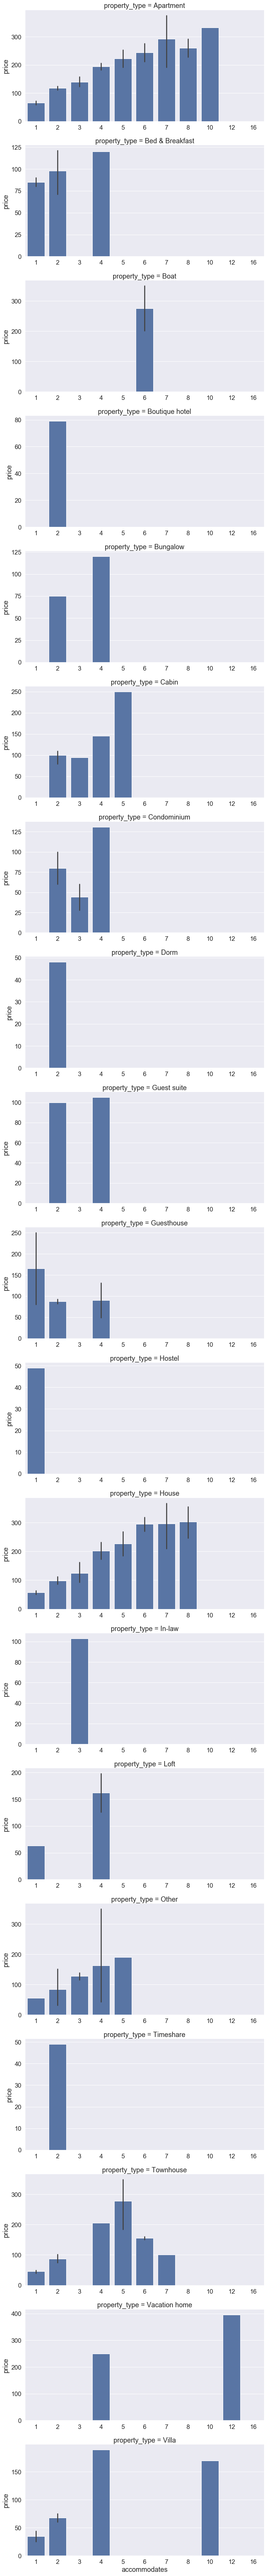

In [219]:
sns.set(font_scale=1.5)
FacetGrid=sns.FacetGrid(air_df,row='property_type', height=5, aspect=2, sharex=False, sharey=False)
FacetGrid.map(sns.barplot,'accommodates', 'price', order=None, hue_order=None)
sns.set(font_scale=2)
FacetGrid.add_legend()
plt.show()


We notice that properties like:

Boat and vacation home- price range is very high with fewer accomodation

villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


In [220]:
def bi_variate(data, col1, col2):
        cross_tab=pd.crosstab(air_df[col1], air_df[col2])
        sns.set(font_scale=1)
        cross_tab.plot.bar(stacked=False, figsize=(12,8))
        plt.xlabel('{}'.format(col1), fontsize=14)
        plt.ylabel('{}'.format(col2), fontsize=14)
        plt.title('{} Vs price'.format(col1), fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
        return cross_tab

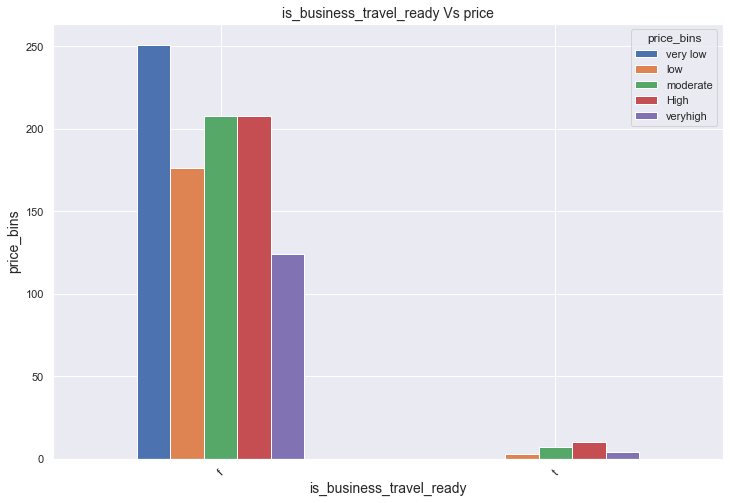

price_bins,very low,low,moderate,High,veryhigh
is_business_travel_ready,,,,,
f,251,176,208,208,124
t,0,3,7,10,4


In [221]:
bi_variate(air_df, 'is_business_travel_ready', 'price_bins')

from the above graph we can infer that the price for business purpose stay falls between moderate to high range and very high range. This means that the price for business purpose stays are always higher than the non-biusiness purpose stay. We can also see that there are very limited no. of options for business purpose stay.

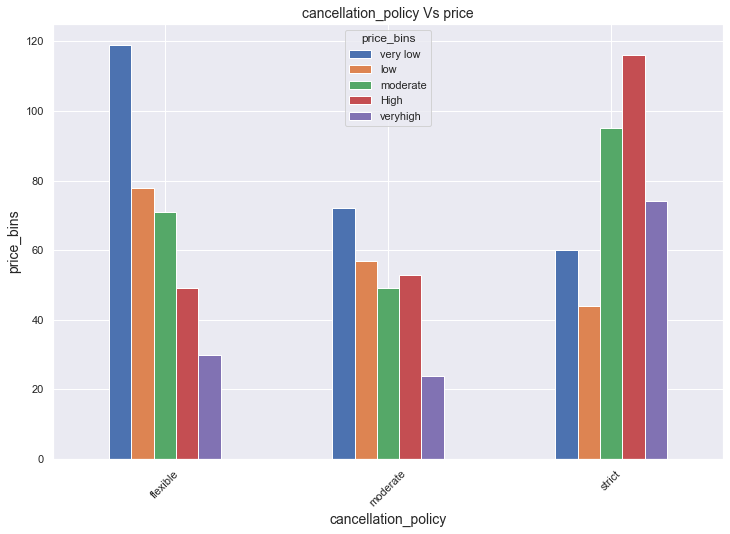

price_bins,very low,low,moderate,High,veryhigh
cancellation_policy,,,,,
flexible,119,78,71,49,30
moderate,72,57,49,53,24
strict,60,44,95,116,74


In [222]:
bi_variate(air_df, 'cancellation_policy', 'price_bins')

from the above plot we learn that the price range increase as the cancellation policy moves form flexible to strict, most of the places follow a strict cancellation policy

In [223]:
from gmplot import gmplot # importing gmplot for plotting geolocation

In [224]:
center_lat=air_df['latitude'].mean()
center_long=air_df['longitude'].mean()
zoom=10

In [225]:
gmap=gmplot.GoogleMapPlotter(center_lat, center_long, zoom)
gmap.scatter(air_df['latitude'], air_df['longitude'], '#3B0B39', size=40, marker=False)
gmap.scatter(air_df['latitude'], air_df['longitude'], c='price_bins', marker=True)
gmap.heatmap(air_df['latitude'], air_df['longitude'])
gmap.draw("D:\\Datascience\\air_bnb.html")

From the plot we can infer that the price also depends on location of the hosts. hosts located at city center charges higher than hosts located on the outskirts

### Data Pre Processing

In [226]:
air_df=air_df.drop('price_bins', axis=1)  # price were binned for better visualization, we do not need them for modelling

categorical- limiting the no. of labels

first lets sort categorical variable property_type 

In [227]:
air_df['property_type'].value_counts() # checking the no. of levels in the property_type variable 

Apartment          648
House              249
Townhouse           31
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Cabin                6
Villa                6
Loft                 3
Vacation home        2
Guest suite          2
Bungalow             2
Boat                 2
In-law               1
Hostel               1
Dorm                 1
Boutique hotel       1
Timeshare            1
Name: property_type, dtype: int64

In [228]:
n=air_df['property_type'].value_counts().index[:2]        #We'll reduce the no. of labels in the variable
air_df['property_type']=air_df.property_type.where(air_df.property_type.isin(n),'other')
air_df['property_type'].value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  


Apartment    648
House        249
other         94
Name: property_type, dtype: int64

In [229]:
air_df['property_type']=air_df['property_type'].astype('category')

step 10: Scaling Numeric Feautres

In [230]:
from sklearn.preprocessing import MinMaxScaler     # importing library for scaling numerical columns

In [231]:
air_df=air_df.drop(['latitude', 'longitude'], axis=1) #lets drop longitude and latitude from the data set

In [232]:
numeric_col=[]            # lets append numerical columns into numeric_col
for col in air_df.select_dtypes(('float64', 'int64')): 
    numeric_col.append(col)

In [233]:
numeric_col

['price',
 'host_total_listings_count',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month']

In [234]:
numeric=air_df.loc[:,numeric_col]               # scaling the numeric variables
nums=np.round(MinMaxScaler().fit_transform(numeric),2)
numeric=pd.DataFrame(nums,columns=numeric_col)
numeric.shape

(991, 8)

step:11 encoding for categorical variables

In [235]:
from sklearn.preprocessing import LabelEncoder #importing Label Encoder library
le=LabelEncoder()

In [236]:
cat_col=[]
for col in air_df.select_dtypes('category'):     #grouping the categorical column
    cat_col.append(col)

In [237]:
cat=air_df.loc[:,cat_col]

In [238]:
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col].astype('str'))   #label encoding the different levels of a categorical variables

In [239]:
cat.shape

(991, 19)

In [240]:
Air_Df=pd.concat([numeric,cat], axis=1)    #concating the numerical and categorical variables into Air_Df

In [241]:
Air_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
price                          991 non-null float64
host_total_listings_count      991 non-null float64
security_deposit               991 non-null float64
cleaning_fee                   991 non-null float64
extra_people                   991 non-null float64
number_of_reviews              991 non-null float64
review_scores_rating           991 non-null float64
reviews_per_month              991 non-null float64
host_is_superhost              991 non-null float64
host_identity_verified         991 non-null float64
property_type                  991 non-null float64
room_type                      991 non-null float64
accommodates                   991 non-null float64
bathrooms                      991 non-null float64
bedrooms                       991 non-null float64
beds                           991 non-null float64
minimum_nights                 991 non-null float64
maximum_ni

We notice that the outlier that we removed have reappeared as 'NAN' in the concated dataset so we shall drop those 'NAN' values along zero axis

In [242]:
Air_Df=Air_Df.dropna(axis=0)  

In [243]:
Air_Df.isnull().sum() #re-check for any null values

price                          0
host_total_listings_count      0
security_deposit               0
cleaning_fee                   0
extra_people                   0
number_of_reviews              0
review_scores_rating           0
reviews_per_month              0
host_is_superhost              0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
dtype: int64

### Modelling 

##### Model1:Linear Regression

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

now lets split the data set into train and test

In [245]:
x=Air_Df.drop('price',axis=1)
y=Air_Df['price']                        #splitting the x-feature and y-target

In [246]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1) # splitting the dataset into train and test sets

In [247]:
print('Size of x_train is:', x_train.shape)
print('Size of x_test is:', x_test.shape)
print('Size of y_train is:', y_train.shape)
print('Size of y_test is:', y_test.shape)

Size of x_train is: (785, 26)
Size of x_test is: (197, 26)
Size of y_train is: (785,)
Size of y_test is: (197,)


In [248]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [249]:
y_pred=model1.predict(x_test)     #Predicting

In [250]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
463,0.58,0.353702
613,0.31,0.238520
331,0.37,0.464217
352,0.47,0.368047
703,0.54,0.298065


In [251]:
linreg_coef=np.round(linreg.coef_,3)   #coefficient of variable for Linear Regression model

In [252]:
result=pd.DataFrame({'Columns':x_train.columns, 'Linear_coef':linreg_coef})
result

,Columns,Linear_coef
0,host_total_listings_count,-0.129
1,security_deposit,0.240
2,cleaning_fee,0.874
3,extra_people,0.218
4,number_of_reviews,-0.023
5,review_scores_rating,-0.099
6,reviews_per_month,0.083
7,host_is_superhost,-0.019
8,host_identity_verified,-0.008
9,property_type,0.003


In [253]:
from sklearn import metrics #importing metrics

In [254]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',np.round(RMSE,2))

Root mean squared error: 0.18


This means our prediction is on a average 0.18$ away from the actual price. lets try fitting in other model to improvise the RMSE 

##### Model:2- Linear Regression using stats model

In [255]:
import statsmodels.api as sm

In [256]:
sm_x_train=sm.add_constant(x_train)
sm_x_test=sm.add_constant(x_test)
lin_reg=sm.OLS(y_train, sm_x_train).fit()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [257]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     11.85
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           6.11e-41
Time:                        21:04:40   Log-Likelihood:                 242.14
No. Observations:                 785   AIC:                            -430.3
Df Residuals:                     758   BIC:                            -304.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1963      0.071      2.771      0.006       0.057       0.335
host_total_listings_count      -0.1291      0.053     -2.413      0.016      -0.234      -0.024
security_deposit                0.2401      0.064      3.747      0.000       0.114       0.366
cleaning_fee                    0.8744      0.071     12.235      0.000       0.734       1.015
extra_people                    0.2176      0.077      2.817      0.005       0.066       0.369
number_of_reviews              -0.0232      0.068     -0.341      0.734      -0.157       0.110
review_scores_rating           -0.0989      0.065     -1.510      0.131      -0.227       0.030
reviews_per_month               0.0833      0.056      1.498      0.135      -0.026       0.193
host_is_superhost              -0.0194      0.023     -0.838      0.402      -0.065       0.026
host_identity_verified         -0.0082      0.014     -0.598      0.550      -0.035       0.019
property_type                   0.0034      0.010      0.323      0.747      -0.017       0.024
room_type                      -0.0082      0.016     -0.510      0.610      -0.040       0.023
accommodates                   -0.0100      0.006     -1.708      0.088      -0.021       0.001
bathrooms                      -0.0026      0.008     -0.328      0.743      -0.019       0.013
bedrooms                        0.0155      0.013      1.175      0.240      -0.010       0.042
beds                            0.0040      0.010      0.401      0.689      -0.015       0.023
minimum_nights                  0.0088      0.003      2.876      0.004       0.003       0.015
maximum_nights                  0.0031      0.003      1.047      0.296      -0.003       0.009
review_scores_accuracy          0.0013      0.003      0.384      0.701      -0.005       0.008
review_scores_cleanliness       0.0008      0.002      0.316      0.752      -0.004       0.006
review_scores_checkin           0.0133      0.006      2.243      0.025       0.002       0.025
review_scores_communication    -0.0153      0.006     -2.608      0.009      -0.027      -0.004
review_scores_location          0.0016      0.005      0.313      0.754      -0.009       0.012
review_scores_value             0.0035      0.004      0.992      0.321      -0.003       0.010
instant_bookable                0.0063      0.015      0.429      0.668      -0.022       0.035
is_business_travel_ready        0.0043      0.042      0.104      0.917      -0.077       0.086
cancellation_policy            -0.0103      0.008     -1.244      0.214      -0.027       0.006
==============================================================================
Omnibus:                      116.637   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarqu

According to the stats model linear regression we infer that Security_deposit, cleaning _fee, extra_people are all significant variables 

In [258]:
stats_predict=lin_reg.predict(sm_x_test)

In [259]:
result2=pd.DataFrame({'Y_actual': y_test, 'y_stats_predict':stats_predict})
result2.head()

,Y_actual,y_stats_predict
463,0.58,0.353702
613,0.31,0.238520
331,0.37,0.464217
352,0.47,0.368047
703,0.54,0.298065


In [260]:
MSE=metrics.mean_squared_error(y_test,stats_predict)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',np.round(RMSE,2))

Root mean squared error: 0.18


the predicted values are on an average 0.18$ away from the actual price. lets try fitting in other model to improvise the RMSE 

##### model:3 Ridge regression

In [261]:
from sklearn.linear_model import Ridge    # importing Ridge Regression

In [262]:
ridge_reg=Ridge(alpha=0.5, random_state=0)
ridge_reg.fit(x_train,y_train)
ridge_pred=ridge_reg.predict(x_test)

In [263]:
ridge_MSE=np.mean((ridge_pred-y_test)**2)
RMSE_ridge=np.sqrt(ridge_MSE)
print ('Root Mean Squared Error is:', round(RMSE_ridge,2))

Root Mean Squared Error is: 0.18


Root mean squared error of Ridge regression is also 0.18

In [264]:
ridge_coef=np.round(ridge_reg.coef_,3) #lets check the coefficeint 
ridge_coef

array([-0.103,  0.246,  0.815,  0.203, -0.021, -0.094,  0.075, -0.02 ,
       -0.007,  0.003, -0.008, -0.01 , -0.002,  0.016,  0.004,  0.009,
        0.003,  0.001,  0.001,  0.013, -0.015,  0.002,  0.004,  0.006,
        0.005, -0.01 ])

In [265]:
result['Ridge_coef']=ridge_coef
result

,Columns,Linear_coef,Ridge_coef
0,host_total_listings_count,-0.129,-0.103
1,security_deposit,0.240,0.246
2,cleaning_fee,0.874,0.815
3,extra_people,0.218,0.203
4,number_of_reviews,-0.023,-0.021
5,review_scores_rating,-0.099,-0.094
6,reviews_per_month,0.083,0.075
7,host_is_superhost,-0.019,-0.020
8,host_identity_verified,-0.008,-0.007
9,property_type,0.003,0.003


##### model 4: Lasson Regression

In [266]:
from sklearn.linear_model import Lasso #import Lasso Regression model

In [267]:
las_reg=Lasso(alpha=0.01, random_state=0)
las_reg.fit(x_train,y_train)
las_pred=las_reg.predict(x_test)

In [268]:
las_MSE=np.mean((las_pred-y_test)**2)
RMSE_lasso=np.sqrt(las_MSE)
print ('Root Mean Squared error is:', round(RMSE_lasso,2))

Root Mean Squared error is: 0.21


The Root mean Squared error of Lasso regression is higer than the other models. so this is definitely not in our race anymore.

In [269]:
lasso_coef=np.round(las_reg.coef_,3)
result['lasso_Coef']=lasso_coef
result

,Columns,Linear_coef,Ridge_coef,lasso_Coef
0,host_total_listings_count,-0.129,-0.103,0.000
1,security_deposit,0.240,0.246,0.000
2,cleaning_fee,0.874,0.815,0.101
3,extra_people,0.218,0.203,0.000
4,number_of_reviews,-0.023,-0.021,-0.000
5,review_scores_rating,-0.099,-0.094,-0.000
6,reviews_per_month,0.083,0.075,-0.000
7,host_is_superhost,-0.019,-0.020,-0.000
8,host_identity_verified,-0.008,-0.007,0.000
9,property_type,0.003,0.003,-0.000


##### Model5: Random Forest Regressor

In [270]:
from sklearn.ensemble import RandomForestRegressor

In [271]:
rand=RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_depth=20)

In [272]:
rand.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [273]:
pred_rand=rand.predict(x_test)

In [274]:
rand_pred_table=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
rand_pred_table.head()

,Actual,Predicted
463,0.58,0.502078
613,0.31,0.270708
331,0.37,0.456813
352,0.47,0.524239
703,0.54,0.346404


In [275]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
print('RMSE:', np.round(RMSE,2))

RMSE: 0.11


root mean squared error is 0.11, this means on an averange our prediction is 0.11 $ away from the actual price

#### Conclusion:

We notice that Random forest model shows a better accuracy rate, lets tune the hyper parameter and see the optimum parameter.

In [276]:
from sklearn.model_selection import GridSearchCV 

In [277]:
rfc=RandomForestRegressor(random_state=1)
param_grid = {
    'n_estimators': [110,115,117],
    'max_depth': [13,15,17],
    'min_samples_leaf': [1,2,3]
}

In [278]:
rf_cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [13, 15, 17],
       

In [279]:
rf_cv.best_params_   # lets check the best parameter

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 110}

We got the above as the best possible parameter for a good and maximum R-squared value, after cross validation

In [280]:
randomforest=RandomForestRegressor(n_estimators=110, min_samples_leaf=2, max_depth=15, random_state=1)

In [281]:
forest=randomforest.fit(x,y)
randomforest_predict=randomforest.predict(x_test)

In [282]:
randomforest_result=pd.DataFrame({'Actual': y_test, 'randomforest_CV':randomforest_predict})
randomforest_result.head()

,Actual,randomforest_CV
463,0.58,0.532820
613,0.31,0.294629
331,0.37,0.406790
352,0.47,0.524074
703,0.54,0.443374


In [283]:
RMSE_CV=np.sqrt(metrics.mean_squared_error(y_test, randomforest_predict))
print('Root Mean Squared Error is:',np.round(RMSE_CV,2))

Root Mean Squared Error is: 0.08


We see that the Root mean squared error is reduced from 0.11 to 0.08 after fine tuning the parameter. This means now our model is doing a better job. 

The price predicted by our model is on an average 0.08$ aways from the actual price 

Now, lets calculate the feature importance 

In [284]:
importance=randomforest.feature_importances_

In [285]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
2,cleaning_fee,0.43
1,security_deposit,0.11
6,reviews_per_month,0.06
4,number_of_reviews,0.04
5,review_scores_rating,0.04
15,minimum_nights,0.04
0,host_total_listings_count,0.03
11,accommodates,0.03
16,maximum_nights,0.03
25,cancellation_policy,0.03


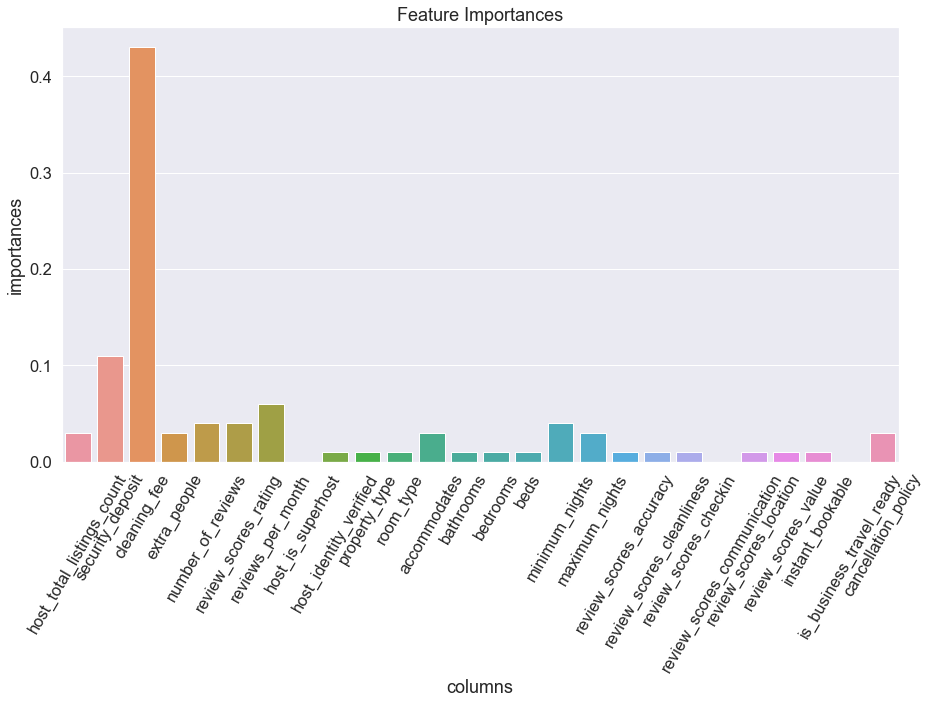

In [286]:
sns.set(font_scale=1.5)                         #visually presenting feature importances
plt.figure(figsize=(15,8))
plot=sns.barplot(x='columns', y='importances', data=feature_imp)
plot.set_xticklabels(x.columns, rotation=60)
plot.set_title('Feature Importances')
plt.show()

From the above graph we see that except for cleaning_fee, reviews_per_month, security deposit, other  features do not explain much about the variance in the dependent feature. Lets us now try the backward Feature selector to remove the irrelvant feature from our model.

In [287]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS   #importing the necessary library
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [288]:
sbs=SFS(LinearRegression(), k_features=(3,25), forward=False, floating=False, cv=0)  
sbs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=False,
                          k_features=(3, 25), n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring=None, verbose=0)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


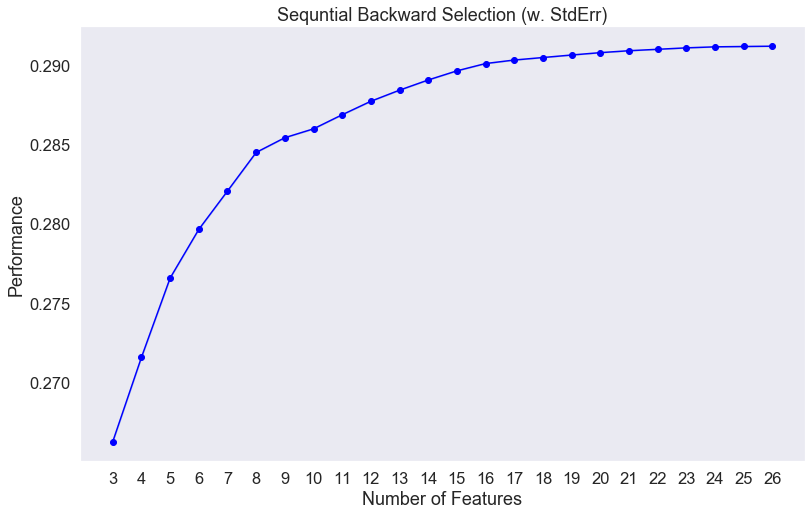

In [289]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev', figsize=(13,8))
plt.title('Sequntial Backward Selection (w. StdErr)')
plt.grid()
plt.show()

We can cleearly see that the K=13 is the optimum no. of significant features. Now lets get the list these significant features 

In [305]:
sbs=SFS(LinearRegression(), k_features=13, forward=False, floating=False, cv=0)  
sbs.fit(x,y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=False,
                          k_features=13, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring=None, verbose=0)

In [306]:
selected_features=sbs.k_feature_names_    #selected features
selected_features

('host_total_listings_count',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'reviews_per_month',
 'accommodates',
 'bathrooms',
 'minimum_nights',
 'maximum_nights',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_value',
 'instant_bookable')

Lets check the model performance with respect to the no. of features to see get the optimal no. of features

In [307]:
x_select=x.loc[:,selected_features]  #lets keep only the selected featurer

In [308]:
x_train,x_test,y_train,y_test=train_test_split(x_select,y,test_size=0.2, random_state=1) # splitting the dataset into train and test sets

In [309]:
print('Size of x_train is:', x_train.shape)
print('Size of x_test is:', x_test.shape)
print('Size of y_train is:', y_train.shape)
print('Size of y_test is:', y_test.shape)

Size of x_train is: (785, 13)
Size of x_test is: (197, 13)
Size of y_train is: (785,)
Size of y_test is: (197,)


Lets once again fit the random forest regressor with the best parameters that we got after fine tuning hyperparameter

In [310]:
randomforest=RandomForestRegressor(n_estimators=110, min_samples_leaf=2, max_depth=15, random_state=1)

forest=randomforest.fit(x_select,y)
randomforest_predict=randomforest.predict(x_test)

In [311]:
final_result=pd.DataFrame({'Actual': y_test, 'randomforest_CV':randomforest_predict})
final_result.head()

,Actual,randomforest_CV
463,0.58,0.526926
613,0.31,0.294865
331,0.37,0.411984
352,0.47,0.585994
703,0.54,0.431805


In [312]:
RMSE_final=np.sqrt(metrics.mean_squared_error(y_test, randomforest_predict))
print('Root Mean Squared Error is:',np.round(RMSE_final,2))

Root Mean Squared Error is: 0.08


The final RMSE is 0.08 i.e. Our model even after feature selection is predicting the price which is on an average 0.08$ away from the actual price. We can thus conclude our result here.

In [313]:
importance_final=randomforest.feature_importances_  #getting final feature importance

In [314]:
feature_imp_final=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance_final,2)})
feature_imp_final.sort_values(by='importances', ascending=False)

,columns,importances
2,cleaning_fee,0.46
1,security_deposit,0.12
4,reviews_per_month,0.10
5,accommodates,0.06
7,minimum_nights,0.06
0,host_total_listings_count,0.04
3,extra_people,0.04
8,maximum_nights,0.04
6,bathrooms,0.02
9,review_scores_checkin,0.02


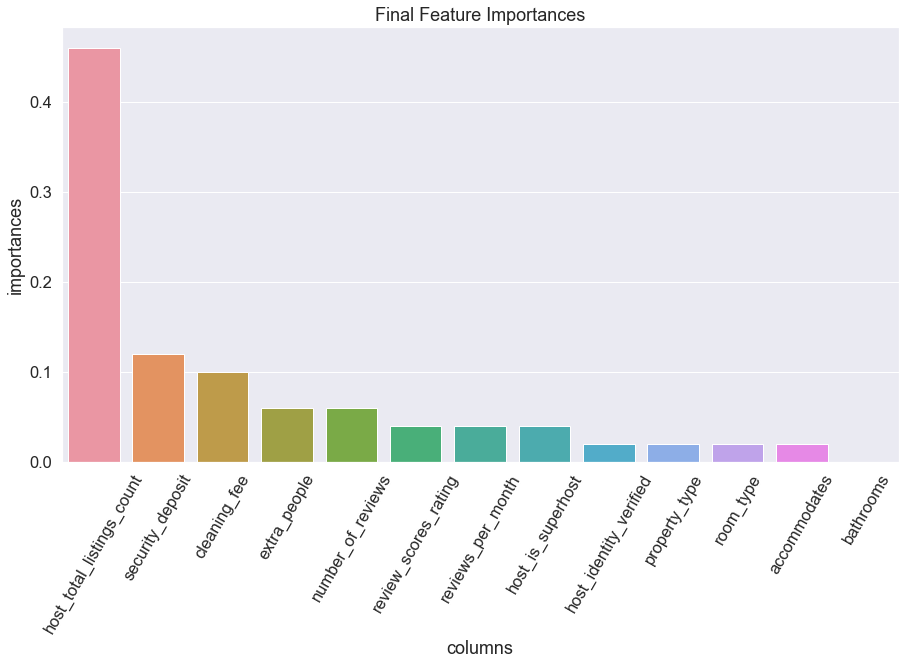

In [315]:
sns.set(font_scale=1.5)                         #visually presenting final feature importances
plt.figure(figsize=(15,8))
plot=sns.barplot(x='columns', y='importances', data=feature_imp_final.sort_values(by='importances', ascending=False))
plot.set_xticklabels(x.columns, rotation=60)
plot.set_title('Final Feature Importances')
plt.show()